## Downloading required packages and dataset

In [2]:
#import numpy as np
#import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
#from keras.utils import np_utils
from keras.optimizers import RMSprop


import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import cifar10 # importing the CIFAR10 dataset


## Exploring the dataset

Traning data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]
Text(0.5, 1.0, '(Label: frog)')
Text(0.5, 1.0, '(Label: cat)')
Size of the dataframe: (50000, 3072)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,...,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353,6
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,...,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706,9
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313725,0.337255,0.329412,9
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,...,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392,4
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,...,0.294118,0.309804,0.321569,0.278431,0.294118,0.305882,0.286275,0.301961,0.313725,1


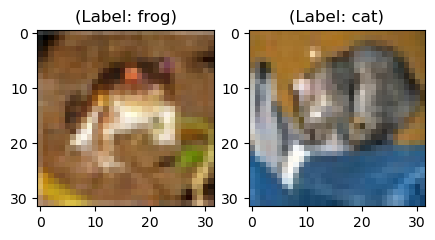

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('Traning data shape:', x_train.shape)
print('Testing data shape:', x_test.shape)
y_train.shape,y_test.shape

# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

label_dict = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck',
}

plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(x_train[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_train[0][0]]) + ")"))

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(x_test[0],(32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_test[0][0]]) + ")"))

# Normalizing the dataset values
x_train = x_train/255.0 
np.min(x_train),np.max(x_train)
x_train.shape

x_test = x_test/255.0
x_test = x_test.reshape(-1,32,32,3)
x_test_flat = x_test.reshape(-1,3072)

# Creating a dataframe to hold the pixel values of the images along with their respective labels in a row-column format.
x_train_flat = x_train.reshape(-1,3072)
feat_cols = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]
df_cifar = pd.DataFrame(x_train_flat,columns=feat_cols)
print('Size of the dataframe: {}'.format(df_cifar.shape))
df_cifar['label'] = y_train
df_cifar.head()

#### Writing up the model that will be used later

In [ ]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

batch_size = 128
num_classes = 10
epochs = 20

model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(99,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

## 2.1. Testing different number of components

### Case 1: Number of components will be set to 2

<Axes: xlabel='principal component 1', ylabel='principal component 2'>

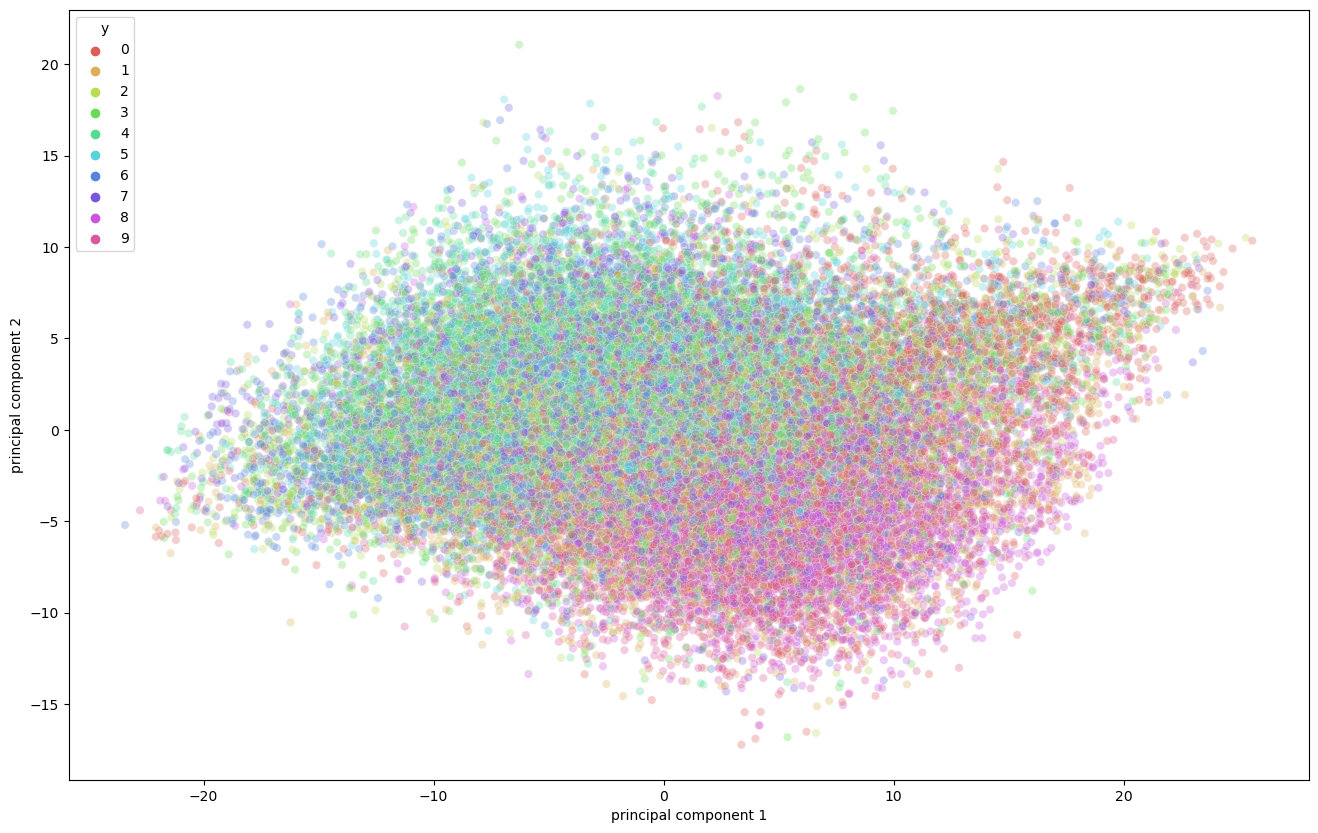

In [8]:
pca_cifar = PCA(n_components=2)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])

principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = ['principal component 1', 'principal component 2'])
principal_cifar_Df['y'] = y_train

principal_cifar_Df.head()

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)

#### Diplaying ```explained_variance_ratio``` using a bar chart

In [ ]:
print('Explained variation per principal component: {}'.format(pca_cifar.explained_variance_ratio_))
# bar chart code

### Case 2: Number of components will be set to 3

In [ ]:
pca_cifar = PCA(n_components=3)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])

principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principal_cifar_Df['y'] = y_train

principal_cifar_Df.head()

print('Explained variation per principal component: {}'.format(pca_cifar.explained_variance_ratio_))

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 2", y="principal component 3",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)

#### Diplaying ```explained_variance_ratio``` using a bar chart

In [ ]:
print('Explained variation per principal component: {}'.format(pca_cifar.explained_variance_ratio_))
# bar chart code

### Case 3: Number of components will be set to 4

In [ ]:
pca_cifar = PCA(n_components=4)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])

principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])
principal_cifar_Df['y'] = y_train

principal_cifar_Df.head()

print('Explained variation per principal component: {}'.format(pca_cifar.explained_variance_ratio_))

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 3", y="principal component 4",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)

#### Diplaying ```explained_variance_ratio``` using a bar chart

In [ ]:
print('Explained variation per principal component: {}'.format(pca_cifar.explained_variance_ratio_))
# bar chart code

### Case 4: Number of components will be set to 5

Explained variation per principal component: [0.2907663  0.11253144 0.06694414 0.03676459 0.03608843]


<Axes: xlabel='principal component 4', ylabel='principal component 5'>

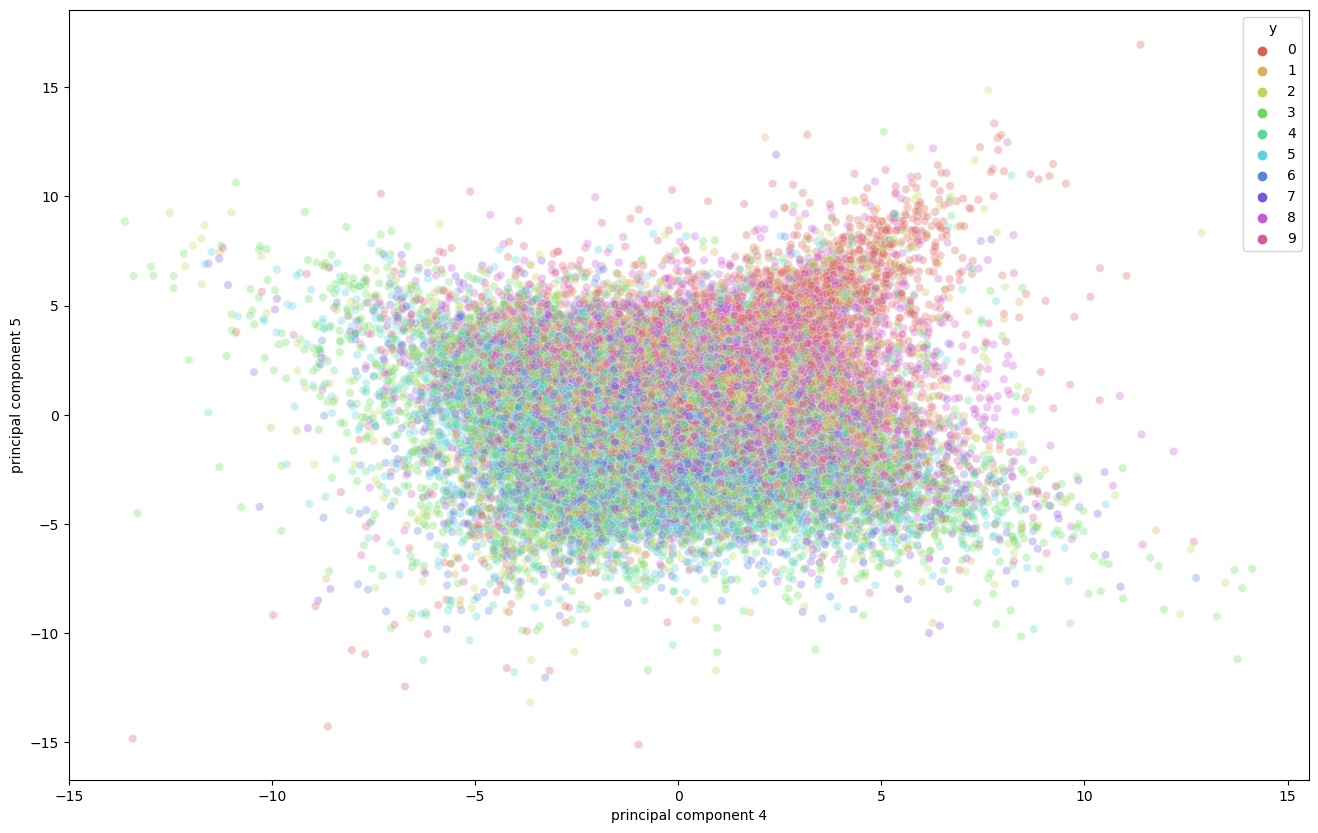

In [7]:
pca_cifar = PCA(n_components=5)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])

principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])
principal_cifar_Df['y'] = y_train

principal_cifar_Df.head()

print('Explained variation per principal component: {}'.format(pca_cifar.explained_variance_ratio_))

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 4", y="principal component 5",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)

#### Diplaying ```explained_variance_ratio``` using a bar chart

In [ ]:
print('Explained variation per principal component: {}'.format(pca_cifar.explained_variance_ratio_))
# bar chart code

## 2.2. Speeding Up ML for diffent variance ratios

### 2.2.1 Case 1: PCA will hold 90% of the variance

In [ ]:
pca = PCA(0.9)
pca.fit(x_train_flat)
PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
pca.n_components_

train_img_pca = pca.transform(x_train_flat)
test_img_pca = pca.transform(x_test_flat)

history = model.fit(train_img_pca, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(test_img_pca, y_test))

### 2.2.2 Case 2: PCA will hold 80% of the variance

In [ ]:
pca = PCA(0.8)
pca.fit(x_train_flat)
PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
pca.n_components_


train_img_pca = pca.transform(x_train_flat)
test_img_pca = pca.transform(x_test_flat)


history = model.fit(train_img_pca, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(test_img_pca, y_test))

### 2.2.3 Case 3: PCA will hold 70% of the variance

In [ ]:
pca = PCA(0.7)
pca.fit(x_train_flat)
PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
pca.n_components_


train_img_pca = pca.transform(x_train_flat)
test_img_pca = pca.transform(x_test_flat)

history = model.fit(train_img_pca, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(test_img_pca, y_test))

### 2.2.4 Case 4: PCA will hold 60% of the variance

In [ ]:
pca = PCA(0.6)
pca.fit(x_train_flat)
PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
pca.n_components_


train_img_pca = pca.transform(x_train_flat)
test_img_pca = pca.transform(x_test_flat)

history = model.fit(train_img_pca, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(test_img_pca, y_test))

### 2.2.5 Case 5: PCA will hold 50% of the variance

In [ ]:
pca = PCA(0.5)
pca.fit(x_train_flat)
PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
pca.n_components_


train_img_pca = pca.transform(x_train_flat)
test_img_pca = pca.transform(x_test_flat)

history = model.fit(train_img_pca, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(test_img_pca, y_test))


## TO RUN THE CODE ON THE ORIGINAL (FLAT) DATASET:
#model = Sequential()
#model.add(Dense(1024, activation='relu', input_shape=(3072,)))
#model.add(Dense(1024, activation='relu'))
#model.add(Dense(512, activation='relu'))
#model.add(Dense(256, activation='relu'))
#model.add(Dense(num_classes, activation='softmax'))
#model.compile(loss='categorical_crossentropy',
#              optimizer=RMSprop(),
#              metrics=['accuracy'])

# history = model.fit(x_train_flat, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
#                    validation_data=(x_test_flat, y_test))